# Image Classification Deep Learning

## Import Libraries and Preprocess Data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input, Lambda, Activation, Dense, Flatten, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import os

In [2]:
image_path = '/home/mjanuadi/image_classification_TransferLearning/data/Food Classification'
class_names = os.listdir(image_path)
num_class = len(class_names)

In [3]:
num_class

6

In [4]:
import splitfolders

# Split with a ratio
splitfolders.ratio('/home/mjanuadi/image_classification_TransferLearning/data/Food Classification', output="dataset", seed=1337, ratio=(.8, .2), group_prefix=None)  # 80% training, 20% validation

Copying files: 3816 files [00:01, 3168.62 files/s]


In [9]:
train_path = '/home/mjanuadi/image_classification_TransferLearning/dataset/train'
validation_path = '/home/mjanuadi/image_classification_TransferLearning/dataset/val'

In [10]:
class_names

['pav_bhaji', 'chai', 'momos', 'butter_naan', 'dhokla', 'kulfi']

In [16]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   rotation_range =40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values from [0, 255] to [0, 1]
)

In [17]:
train_generator = train_datagen.flow_from_directory(image_path, batch_size = 32, class_mode = 'categorical',
                                                    target_size = (224, 224), subset='training',
                                                    shuffle = None, seed =200)

Found 1529 images belonging to 6 classes.


In [18]:
validation_generator = train_datagen.flow_from_directory(validation_path, batch_size = 32, class_mode = 'categorical',
                                                    target_size = (224, 224), subset='training',
                                                    shuffle = None, seed = 200)

Found 297 images belonging to 6 classes.


In [19]:
true_class = validation_generator.classes

true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int3

## Arsitektur InceptionV3

In [15]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


for layer in pre_trained_model.layers:
  layer.trainable = False

2024-05-28 11:28:06.551540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 11:28:06.584430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 11:28:06.584474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 11:28:06.585724: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

87924736/87910968 [==============================] - 42s 0us/step


In [20]:
# Versi 1
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(num_class, activation = 'softmax')(x)
model = Model(pre_trained_model.input, x)

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
epochs = 10
history = model.fit(train_generator,
                    epochs  = epochs,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

Epoch 1/10


2024-05-28 11:35:43.835336: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2024-05-28 11:35:45.905720: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-28 11:35:49.311646: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


48/48 [==============================] - 40s 599ms/step - loss: 13.4841 - accuracy: 0.2328 - val_loss: 1.3583 - val_accuracy: 0.5387
Epoch 2/10
48/48 [==============================] - 25s 527ms/step - loss: 1.3715 - accuracy: 0.5088 - val_loss: 1.1174 - val_accuracy: 0.5724
Epoch 3/10
48/48 [==============================] - 25s 516ms/step - loss: 1.2235 - accuracy: 0.5729 - val_loss: 1.3933 - val_accuracy: 0.4983
Epoch 4/10
48/48 [==============================] - 30s 621ms/step - loss: 1.0546 - accuracy: 0.6337 - val_loss: 0.7553 - val_accuracy: 0.7677
Epoch 5/10
48/48 [==============================] - 27s 553ms/step - loss: 0.8649 - accuracy: 0.6991 - val_loss: 0.7753 - val_accuracy: 0.7374
Epoch 6/10
48/48 [==============================] - 24s 505ms/step - loss: 0.8508 - accuracy: 0.6978 - val_loss: 0.7144 - val_accuracy: 0.7576
Epoch 7/10
48/48 [==============================] - 27s 563ms/step - loss: 0.7862 - accuracy: 0.7299 - val_loss: 0.5288 - val_accuracy: 0.8418
Epoch 8/1

In [22]:
#Prediksi

pred = model.predict(validation_generator)
predicted_class = pred.argmax(axis=1)
predicted_class


# True Class
true_class = validation_generator.classes
true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int3

In [23]:
# Evaluasi
from sklearn.metrics import classification_report
print(classification_report(true_class, predicted_class))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        51
           1       0.87      0.84      0.86        57
           2       0.58      0.89      0.70        45
           3       0.72      0.95      0.82        40
           4       0.97      0.78      0.87        50
           5       0.94      0.57      0.71        54

    accuracy                           0.81       297
   macro avg       0.84      0.82      0.81       297
weighted avg       0.85      0.81      0.81       297



In [24]:
history.history

{'loss': [13.484146118164062,
  1.3714767694473267,
  1.2234519720077515,
  1.0545982122421265,
  0.8649227619171143,
  0.8508206009864807,
  0.7862473726272583,
  0.6571875214576721,
  0.6656104326248169,
  0.5985496044158936],
 'accuracy': [0.2328319102525711,
  0.5088292956352234,
  0.572923481464386,
  0.6337475180625916,
  0.6991497874259949,
  0.6978417038917542,
  0.7298887968063354,
  0.7573577761650085,
  0.774362325668335,
  0.7822105884552002],
 'val_loss': [1.3583306074142456,
  1.1174253225326538,
  1.3932682275772095,
  0.7552998661994934,
  0.7753190994262695,
  0.7143909335136414,
  0.528818666934967,
  0.6154177784919739,
  0.5541079640388489,
  0.5507268905639648],
 'val_accuracy': [0.5387205481529236,
  0.5723905563354492,
  0.4983164966106415,
  0.7676767706871033,
  0.7373737096786499,
  0.7575757503509521,
  0.8417508602142334,
  0.7710437774658203,
  0.8148148059844971,
  0.8013467788696289]}

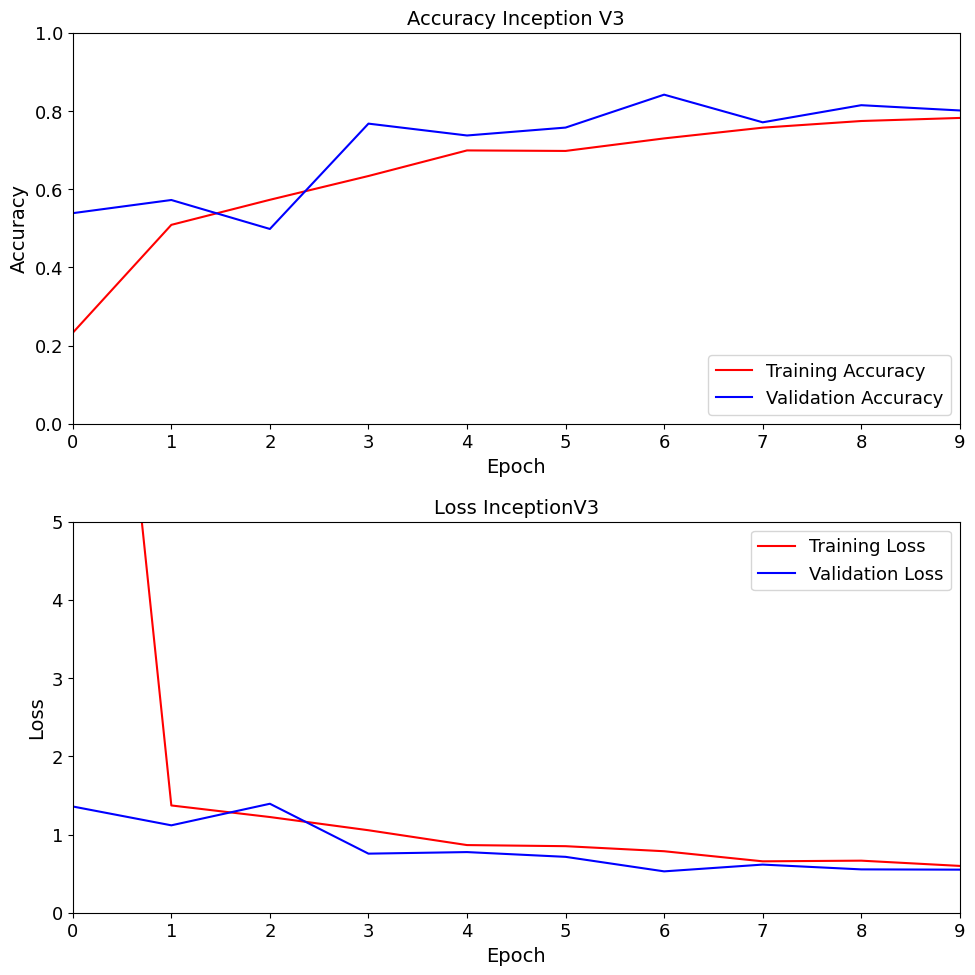

In [32]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 9, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy Inception V3')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 9, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss InceptionV3')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

### Arsitektur Resnet50

In [33]:
from tensorflow.keras.applications.resnet50 import ResNet50

ttl = 'Arsitektur ResNet50'

pre_traned_model = ResNet50(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

In [36]:
resnet_model = Sequential()
resnet_model.add(pre_trained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(num_class, activation = 'softmax'))

resnet_model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
                     metrics=['accuracy'])

epochs = 10
history = resnet_model.fit(train_generator,
                           epochs = epochs,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

Epoch 1/10
48/48 [==============================] - 32s 600ms/step - loss: 42.6010 - accuracy: 0.1759 - val_loss: 1.7480 - val_accuracy: 0.2054
Epoch 2/10
48/48 [==============================] - 27s 567ms/step - loss: 1.6916 - accuracy: 0.3152 - val_loss: 1.4365 - val_accuracy: 0.4579
Epoch 3/10
48/48 [==============================] - 28s 583ms/step - loss: 1.4356 - accuracy: 0.4572 - val_loss: 1.3734 - val_accuracy: 0.4848
Epoch 4/10
48/48 [==============================] - 29s 601ms/step - loss: 1.4769 - accuracy: 0.4853 - val_loss: 1.3403 - val_accuracy: 0.5488
Epoch 5/10
48/48 [==============================] - 27s 569ms/step - loss: 1.3670 - accuracy: 0.5376 - val_loss: 1.2888 - val_accuracy: 0.5892
Epoch 6/10
48/48 [==============================] - 24s 507ms/step - loss: 1.2724 - accuracy: 0.5566 - val_loss: 1.1526 - val_accuracy: 0.6296
Epoch 7/10
48/48 [==============================] - 26s 549ms/step - loss: 1.1593 - accuracy: 0.6141 - val_loss: 1.1113 - val_accuracy: 0.626

In [37]:
prediction = resnet_model.predict(validation_generator)
predicted_class = prediction.argmax(axis=-1)
predicted_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
print(classification_report(true_class, predicted_class))

              precision    recall  f1-score   support

           0       0.28      1.00      0.43        51
           1       0.83      0.95      0.89        57
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        40
           4       0.93      0.86      0.90        50
           5       0.00      0.00      0.00        54

    accuracy                           0.50       297
   macro avg       0.34      0.47      0.37       297
weighted avg       0.36      0.50      0.39       297



/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

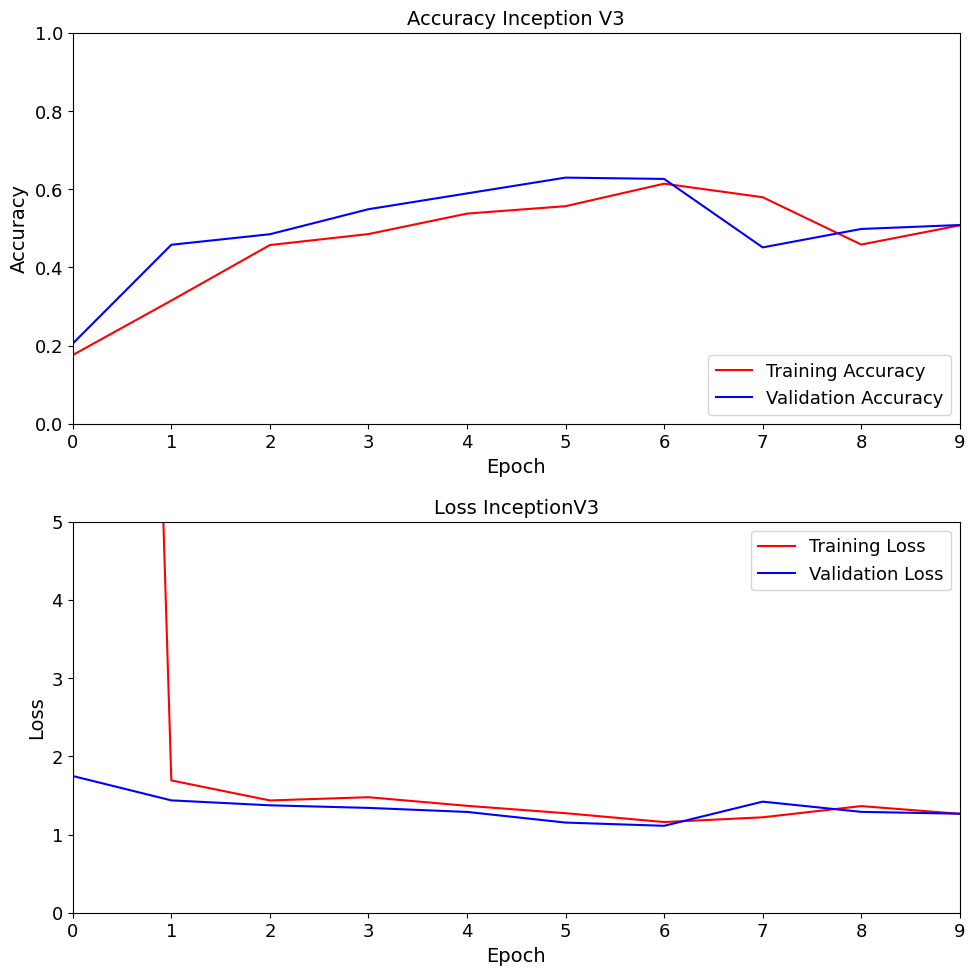

In [39]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 9, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy Inception V3')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 9, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss InceptionV3')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

### Arsitektur Xception

In [40]:
from tensorflow.keras.applications.xception import Xception

pre_trained_model = Xception(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

83697664/83683744 [==============================] - 36s 0us/step


In [41]:
model_xception = Sequential()
model_xception.add(pre_trained_model)
model_xception.add(Flatten())
model_xception.add(Dense(512, activation = 'relu'))
model_xception.add(Dense(num_class, activation = 'softmax'))

model_xception.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics= ['accuracy'])

epochs = 10
history = model_xception.fit(train_generator,
                           epochs = epochs,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

Epoch 1/10


2024-05-28 11:59:55.886882: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


48/48 [==============================] - 29s 562ms/step - loss: 26.6785 - accuracy: 0.2688 - val_loss: 1.2999 - val_accuracy: 0.4949
Epoch 2/10
48/48 [==============================] - 26s 533ms/step - loss: 1.7102 - accuracy: 0.4565 - val_loss: 1.3491 - val_accuracy: 0.4512
Epoch 3/10
48/48 [==============================] - 26s 539ms/step - loss: 1.2742 - accuracy: 0.5317 - val_loss: 1.0739 - val_accuracy: 0.6566
Epoch 4/10
48/48 [==============================] - 27s 559ms/step - loss: 1.1301 - accuracy: 0.5867 - val_loss: 0.7947 - val_accuracy: 0.7306
Epoch 5/10
48/48 [==============================] - 28s 588ms/step - loss: 0.9535 - accuracy: 0.6880 - val_loss: 0.8847 - val_accuracy: 0.7172
Epoch 6/10
48/48 [==============================] - 27s 566ms/step - loss: 0.9498 - accuracy: 0.6815 - val_loss: 0.8041 - val_accuracy: 0.7710
Epoch 7/10
48/48 [==============================] - 26s 541ms/step - loss: 0.6225 - accuracy: 0.7933 - val_loss: 0.7482 - val_accuracy: 0.7643
Epoch 8/1

In [42]:
predict = model_xception.predict_generator(validation_generator, len(validation_generator))
class_predict = predict.argmax(axis=1)

/tmp/ipykernel_1494/4000698848.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model_xception.predict_generator(validation_generator, len(validation_generator))


In [43]:
print(classification_report(true_class, class_predict))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84        51
           1       0.94      0.77      0.85        57
           2       1.00      0.64      0.78        45
           3       0.73      0.88      0.80        40
           4       0.80      0.86      0.83        50
           5       0.80      0.80      0.80        54

    accuracy                           0.82       297
   macro avg       0.84      0.82      0.82       297
weighted avg       0.84      0.82      0.82       297



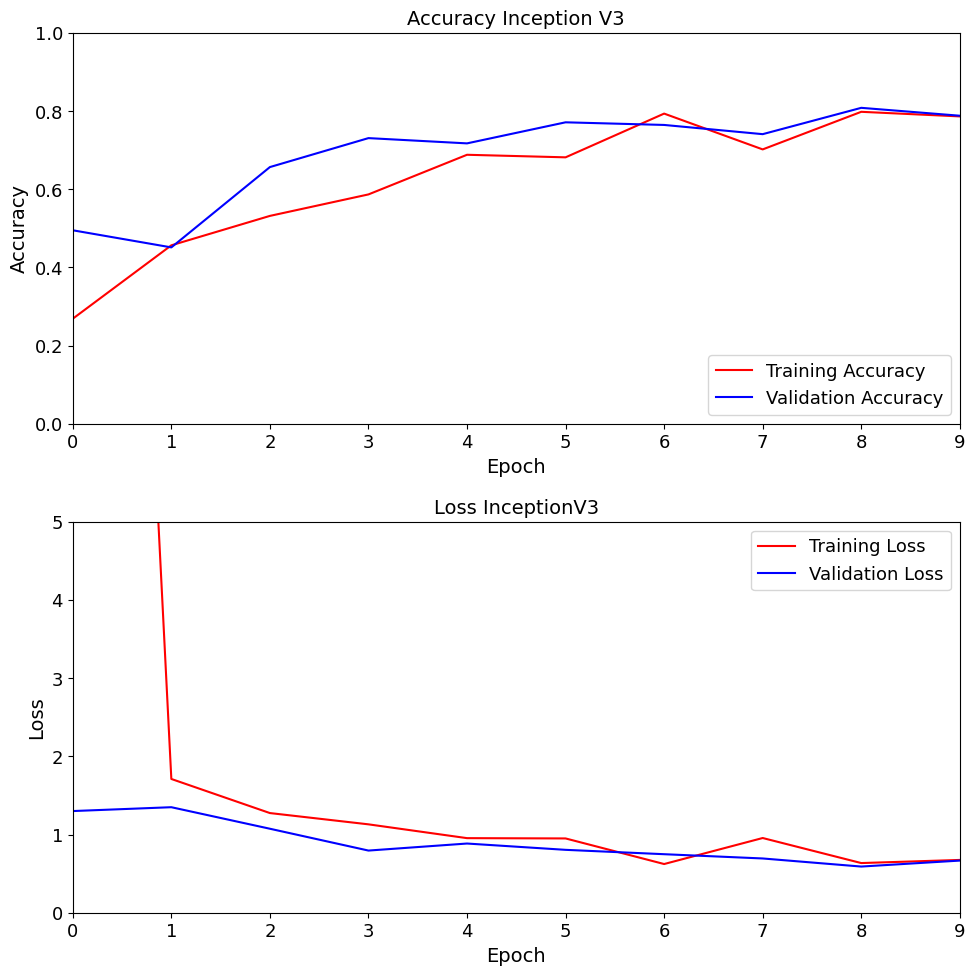

In [44]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 9, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy Inception V3')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 9, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss InceptionV3')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

### Arsitektur MobileNet

In [45]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Model

pre_trained_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze all the layers in the base model
for layer in pre_trained_model.layers:
    layer.trainable = False


model_mobilenet = Sequential()
model_mobilenet.add(pre_trained_model)
model_mobilenet.add(Flatten())
model_mobilenet.add(Dense(512, activation = 'relu'))
model_mobilenet.add(Dense(num_class, activation = 'softmax'))

model_mobilenet.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = resnet_model.fit(train_generator,
                           epochs = epochs,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

17235968/17225924 [==============================] - 7s 0us/step
Epoch 1/10
48/48 [==============================] - 25s 521ms/step - loss: 1.2842 - accuracy: 0.4938 - val_loss: 1.3046 - val_accuracy: 0.5051
Epoch 2/10
48/48 [==============================] - 28s 591ms/step - loss: 1.3448 - accuracy: 0.4872 - val_loss: 1.2645 - val_accuracy: 0.5118
Epoch 3/10
48/48 [==============================] - 27s 566ms/step - loss: 1.2324 - accuracy: 0.5075 - val_loss: 1.3329 - val_accuracy: 0.4781
Epoch 4/10
48/48 [==============================] - 26s 541ms/step - loss: 1.2534 - accuracy: 0.4957 - val_loss: 1.2581 - val_accuracy: 0.4949
Epoch 5/10
48/48 [==============================] - 26s 545ms/step - loss: 1.2459 - accuracy: 0.5095 - val_loss: 1.2422 - val_accuracy: 0.5084
Epoch 6/10
48/48 [==============================] - 24s 500ms/step - loss: 1.2085 - accuracy: 0.5062 - val_loss: 1.3068 - val_accuracy: 0.4983
Epoch 7/10
48/48 [==============================] - 27s 563ms/step - loss: 1.

In [46]:
predict = model_mobilenet.predict_generator(validation_generator, len(validation_generator))
class_predict = predict.argmax(axis=1)

/tmp/ipykernel_1494/213299982.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model_mobilenet.predict_generator(validation_generator, len(validation_generator))


In [47]:
print(classification_report(true_class, class_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.20      0.23      0.21        57
           2       0.18      0.49      0.26        45
           3       0.28      0.17      0.22        40
           4       0.14      0.04      0.06        50
           5       0.24      0.31      0.27        54

    accuracy                           0.21       297
   macro avg       0.17      0.21      0.17       297
weighted avg       0.17      0.21      0.17       297



/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

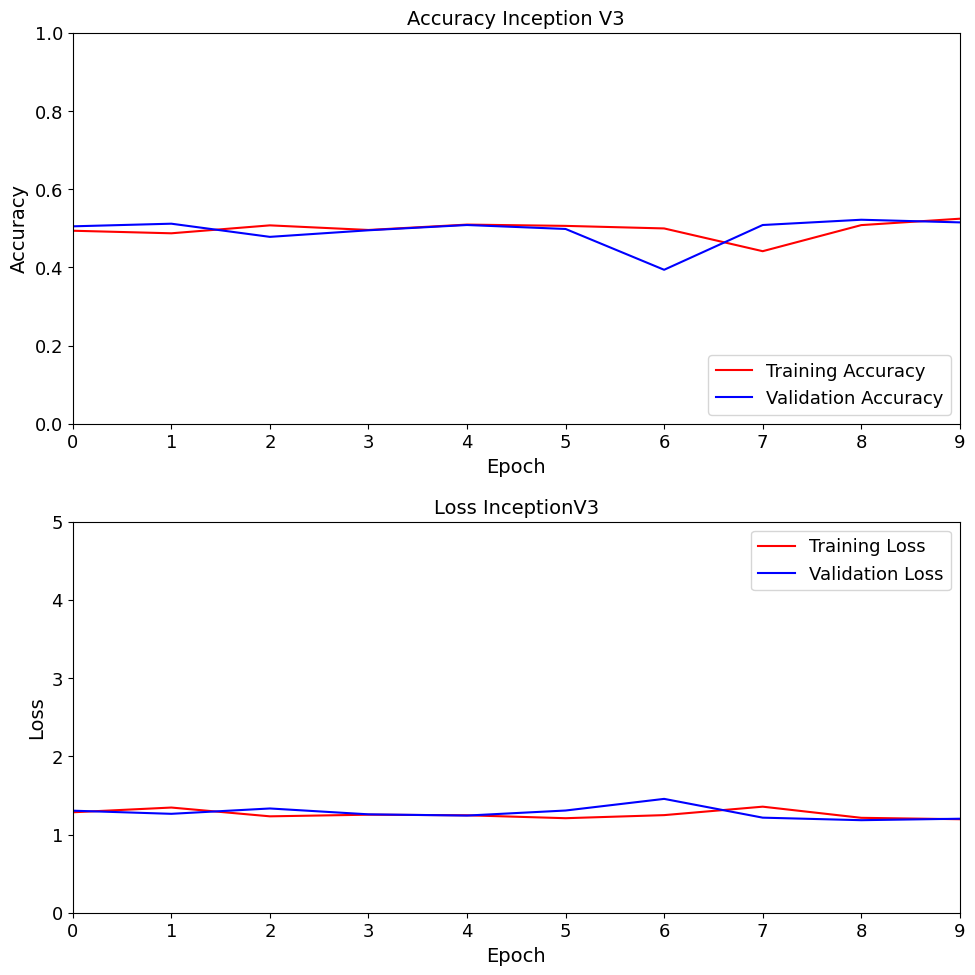

In [48]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 9, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy Inception V3')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 9, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss InceptionV3')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

### Arsitektur EfficientNet

In [51]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Model

# Load the pre-trained EfficientNetB0 model without the top layers
pre_trained_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze all the layers in the base model
for layer in pre_trained_model.layers:
    layer.trainable = False



2024-05-28 12:12:12.283186: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 294.0KiB (rounded to 301056)requested by op AddV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-05-28 12:12:12.283502: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2024-05-28 12:12:12.283528: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 541, Chunks in use: 541. 135.2KiB allocated for chunks. 135.2KiB in use in bin. 45.3KiB client-requested in use in bin.
2024-05-28 12:12:12.283540: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 474, Chunks in use: 474. 300.8KiB allocated for chunks. 300.8KiB in use in bin. 266.2KiB client-requested in use in bin.
2024-05-28 12:12:12.28354

ResourceExhaustedError: failed to allocate memory [Op:AddV2]

In [ ]:
model_efficient = Sequential()
model_efficient.add(pre_trained_model)
model_efficient.add(Flatten())
model_efficient.add(Dense(512, activation = 'relu'))
model_efficient.add(Dense(num_class, activation = 'softmax'))

model_efficient.compile(optimizer=Adam(), loss = 'categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = model_efficient.fit(train_generator,
                           epochs = epochs,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

In [ ]:
predict = model_efficient.predict_generator(validation_generator, len(validation_generator))
class_predict = predict.argmax(axis=1)

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 9, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy Inception V3')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 9, 0, 5])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss InceptionV3')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()